In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image
import h5py
import os

In [31]:
f = h5py.File('..\..\Data\data_109.h5', 'r')
f.keys()
#f['Sequence'].keys()
f['Sequence']['0'].keys()

<KeysViewHDF5 ['Detections', 'Image', 'Points', 'Security', 'Tracks']>

In [54]:
world2cam_matrix = np.asarray(f['TMatrixWorldToCam'])
world2cam_matrix.shape

(4, 4)

In [55]:
proj_matrix = np.asarray(f['ProjectionMatrix'])
proj_matrix

array([[ 3.48025469e+02,  0.00000000e+00,  3.89720963e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  3.98250028e+02,  2.91244594e+02,
        -1.81898940e-12],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00]])

In [33]:
#Choose an instant
frame = f['Sequence']['730']

In [34]:
# Detections
np.asarray(frame['Detections'])

array([((10.15909738, -5.72488395, -1.10602823), 3.78564644, 0.37349591, 1.78490806, 1.49987257),
       ((-6.73447514, 23.63771317, -1.13711529), 2.2411468 , 1.47715962, 1.45631874, 1.5422827 ),
       ((-2.53191846, 29.16449062, -0.91711677), 1.67298651, 1.22097492, 1.91595078, 1.30960631)],
      dtype=[('Pos', [('X', '<f8'), ('Y', '<f8'), ('Z', '<f8')]), ('Length', '<f8'), ('Width', '<f8'), ('Height', '<f8'), ('Angle', '<f8')])

In [36]:
# Tracks
np.asarray(frame['Tracks'])

array([(904, (-6.97081624, 23.64717533, -1.12694108), (-0.16250388,  0.98905336,  0.03343586), 18, 2),
       (906, (10.12959563, -6.35163374, -1.22015665), ( 0.45653028, -4.1953461 , -0.07944497), 18, 2),
       (909, (-2.50603034, 29.14999051, -0.90539246), ( 1.70950458,  6.24991193, -0.02661349),  0, 1)],
      dtype=[('TrackId', '<i8'), ('Pos', [('X', '<f8'), ('Y', '<f8'), ('Z', '<f8')]), ('Vel', [('X', '<f8'), ('Y', '<f8'), ('Z', '<f8')]), ('ClassId', '<u4'), ('Status', '<i4')])

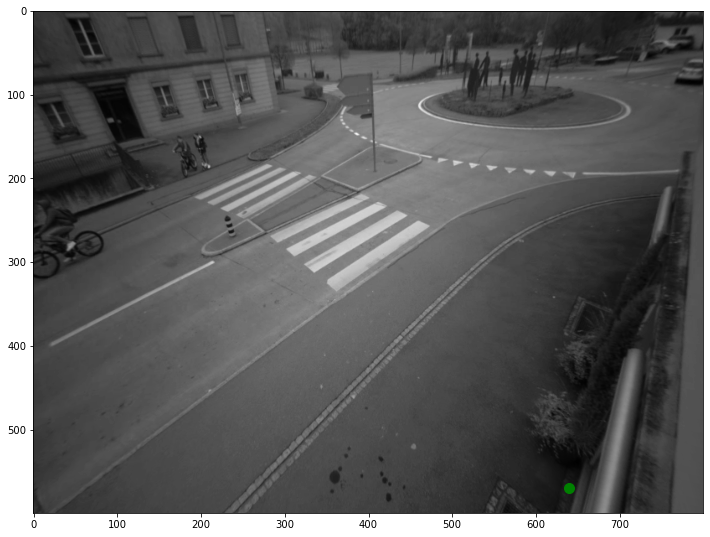

In [69]:
# Show image
a = np.asarray(frame['Image'])
plt.figure(figsize = (12,12))
plt.imshow(a, cmap = 'gist_gray')
plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
plt.show()

In [96]:
# Add point
detec_points = np.asarray(frame['Detections'])
detec_points

p1 = detec_points[0]
p1[0][0]
#.dot(world2cam_matrix)

10.159097381887214

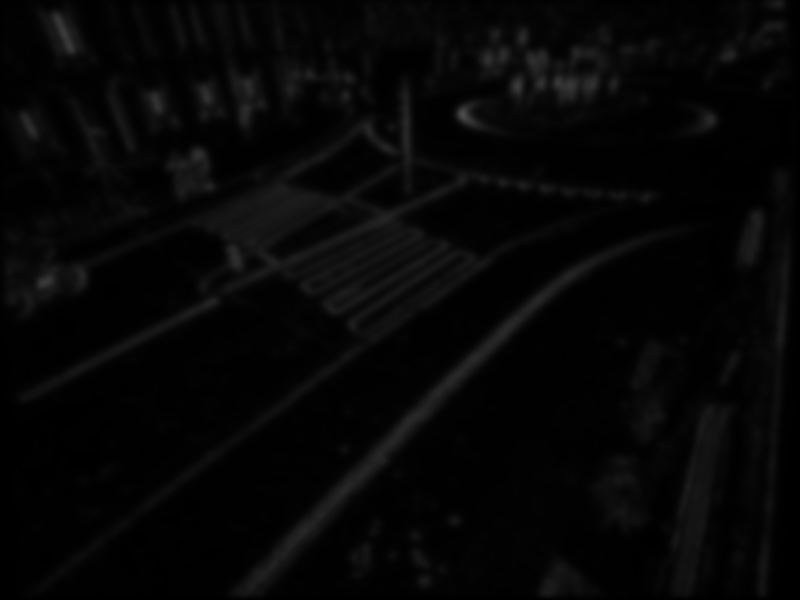

In [38]:
# Show security
a = np.asarray(frame['Security'])
aim = Image.fromarray(a)
aim